# Exploratory Data Analysis for Model 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

# Make plots larger
plt.rcParams['figure.figsize'] = (15, 9)
from __future__ import print_function
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
import warnings

warnings.filterwarnings('ignore')

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
data_xls = pd.read_csv('green_tripdata_2018-01.csv')
data_xls.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2018-01-01 00:18:50,2018-01-01 00:24:39,N,1,236,236,5,0.70,6.0,0.5,0.5,0.0,0.0,NaN,0.3,7.3,2,1.0
1,2,2018-01-01 00:30:26,2018-01-01 00:46:42,N,1,43,42,5,3.50,14.5,0.5,0.5,0.0,0.0,NaN,0.3,15.8,2,1.0
2,2,2018-01-01 00:07:25,2018-01-01 00:19:45,N,1,74,152,1,2.14,10.0,0.5,0.5,0.0,0.0,NaN,0.3,11.3,2,1.0
3,2,2018-01-01 00:32:40,2018-01-01 00:33:41,N,1,255,255,1,0.03,-3.0,-0.5,-0.5,0.0,0.0,NaN,-0.3,-4.3,3,1.0
4,2,2018-01-01 00:32:40,2018-01-01 00:33:41,N,1,255,255,1,0.03,3.0,0.5,0.5,0.0,0.0,NaN,0.3,4.3,2,1.0


In [3]:
data_xls.describe

<bound method NDFrame.describe of         VendorID lpep_pickup_datetime lpep_dropoff_datetime  \
0              2  2018-01-01 00:18:50   2018-01-01 00:24:39   
1              2  2018-01-01 00:30:26   2018-01-01 00:46:42   
2              2  2018-01-01 00:07:25   2018-01-01 00:19:45   
3              2  2018-01-01 00:32:40   2018-01-01 00:33:41   
4              2  2018-01-01 00:32:40   2018-01-01 00:33:41   
5              2  2018-01-01 00:38:35   2018-01-01 01:08:50   
6              2  2018-01-01 00:18:41   2018-01-01 00:28:22   
7              2  2018-01-01 00:38:02   2018-01-01 00:55:02   
8              2  2018-01-01 00:05:02   2018-01-01 00:18:35   
9              2  2018-01-01 00:35:23   2018-01-01 00:42:07   
10             2  2018-01-01 00:21:00   2018-01-01 00:39:04   
11             2  2018-01-01 00:56:29   2018-01-01 01:04:44   
12             2  2018-01-01 00:11:48   2018-01-01 00:30:13   
13             2  2018-01-01 00:57:59   2018-01-01 01:12:26   
14             2  201

In [4]:
data_xls.dtypes

VendorID                   int64
lpep_pickup_datetime      object
lpep_dropoff_datetime     object
store_and_fwd_flag        object
RatecodeID                 int64
PULocationID               int64
DOLocationID               int64
passenger_count            int64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
ehail_fee                float64
improvement_surcharge    float64
total_amount             float64
payment_type               int64
trip_type                float64
dtype: object

In [5]:
df1 = data_xls.iloc[:,0:3]

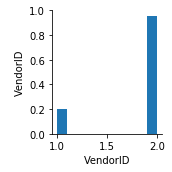

In [6]:
sns.pairplot(df1)

In [7]:
data_xls.drop('lpep_pickup_datetime', axis= 'columns', inplace=True)

In [8]:
data_xls.drop('lpep_dropoff_datetime', axis= 'columns', inplace=True)

In [9]:
data_xls.drop('store_and_fwd_flag', axis= 'columns', inplace=True)

In [10]:
data_xls.drop('ehail_fee', axis= 'columns', inplace=True)

In [11]:
data_xls.columns

Index(['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type'],
      dtype='object')

In [15]:
data_xls.size

11902935

In [17]:
df1 = data_xls.iloc[:,5:10]

# Scatter Plots

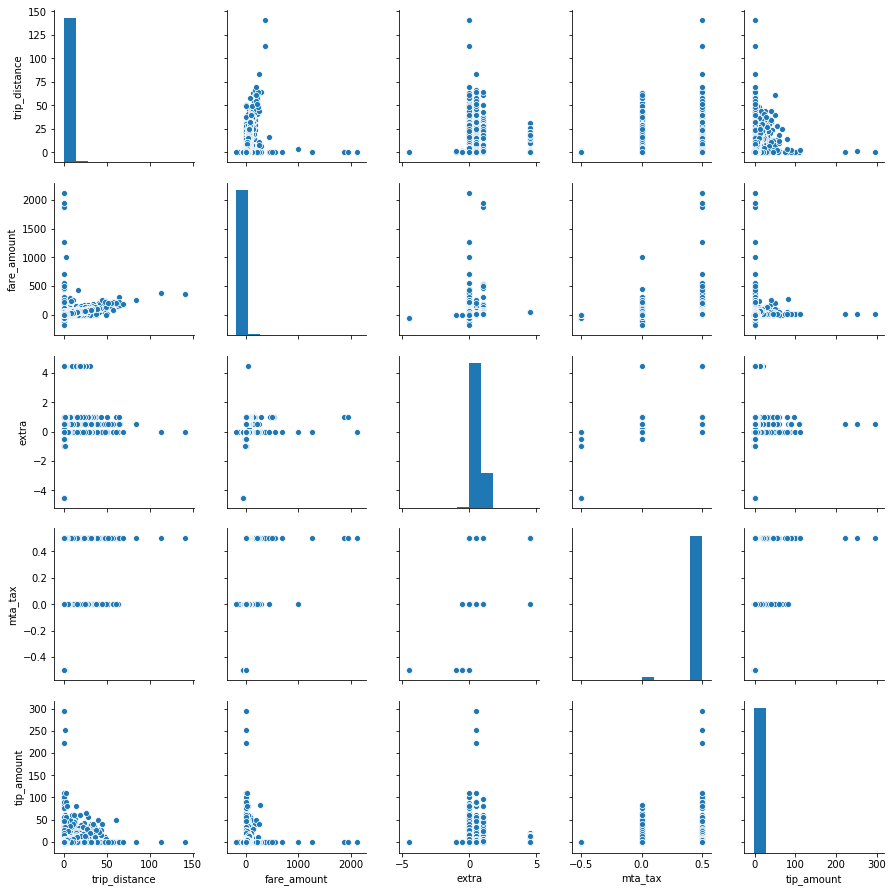

In [14]:
sns.pairplot(df1)

# Are any model assumptions violated?
### 1)Linear relationship :
Plotting a Scatter plot.Assumption 1: To check if their is a linear relationship in the model.Linear regression needs the relationship between the independent and dependent variables to be linear.The linearity assumption can best be tested with scatter plots,the following examples depict all the cases, where no and little linearity is present.


In [18]:
df1 = data_xls.iloc[:,5:14]

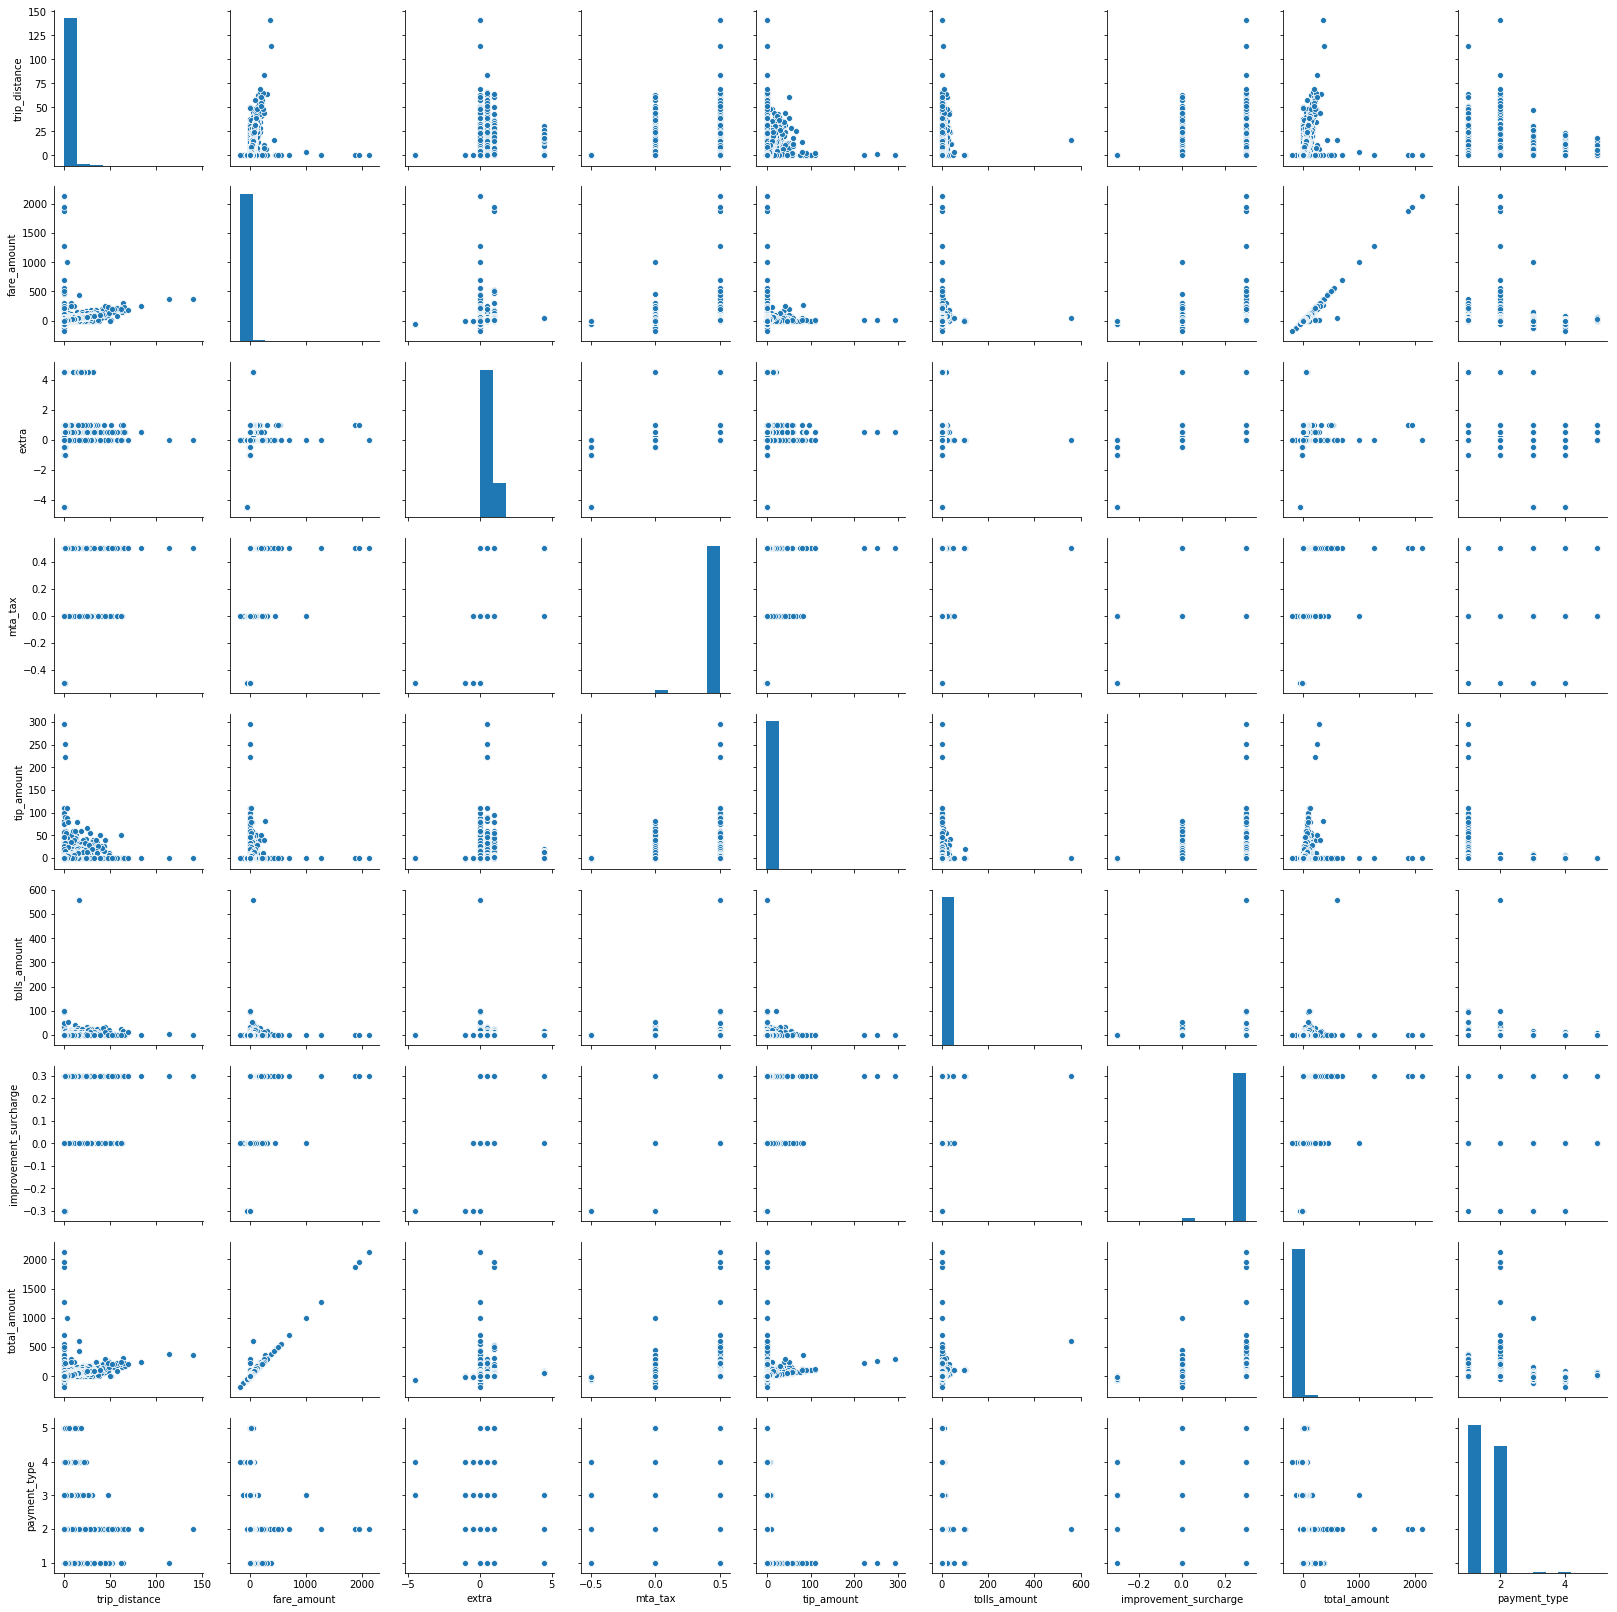

In [19]:
sns.pairplot(df1)

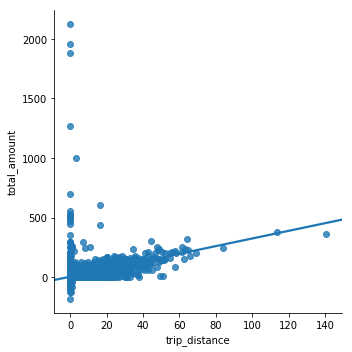

In [20]:
sns.lmplot(x="trip_distance", y="total_amount", data=data_xls, x_jitter=.05);

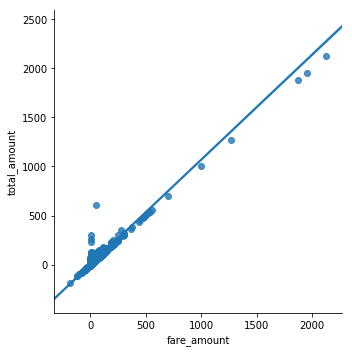

In [21]:
sns.lmplot(x="fare_amount", y="total_amount", data=data_xls, x_jitter=.05);

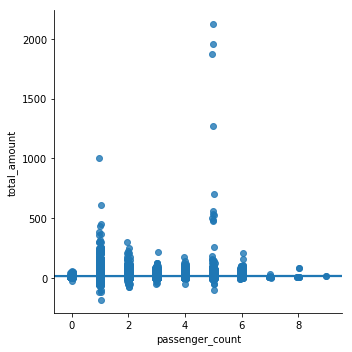

In [22]:
sns.lmplot(x="passenger_count", y="total_amount", data=data_xls, x_jitter=.05);

# Is the relationship significant?
As the p-value is much less than 0.05, we reject the null hypothesis that β = 0.Hence there is a significant relationship between the variables in the linear regression model of the dataset. Hence, the model has a significant relationship.

In [3]:
model = ols("total_amount ~ trip_distance + fare_amount + passenger_count -1", data=data_xls).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_amount   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 1.541e+07
Date:                Sun, 18 Nov 2018   Prob (F-statistic):               0.00
Time:                        21:09:20   Log-Likelihood:            -1.7940e+06
No. Observations:              793529   AIC:                         3.588e+06
Df Residuals:                  793526   BIC:                         3.588e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
trip_distance       0.2619      0.002    165.437      0.000       0.259       0.265
fare_amount         1.0493      0.000   2511.525      0.000       1.048       1.050
passenger_count     0.4634      0.002    244.060      0.000       0.460       0.467
==============================================================================
Omnibus:                  1989971.957   Durbin-Watson:                   1.787
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     813355182428.888
Skew:                          26.190   Prob(JB):                         0.00
Kurtosis:                    4962.525   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 2)Multivariate Normality:
Plotting a Q-Q plot for the model.Assumption 2: To check for multivariate normality in the model.This assumption can best be checked with a Q-Q-Plot.Normality can be checked with a goodness of fit test.Below graphs shows that the variables are multivariate normal


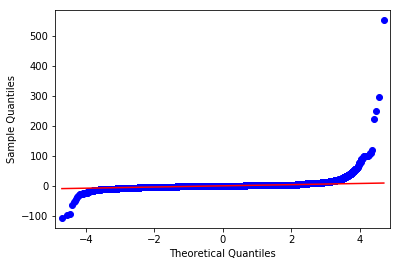

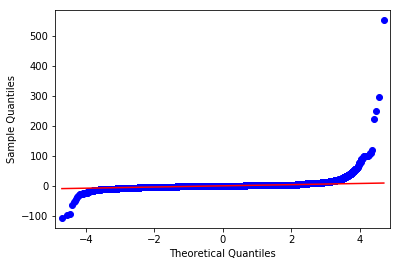

In [25]:
#Q-Q plot to check multivariate normality
import statsmodels.api as statmodel
plot= model.resid
statmodel.qqplot(plot,line='r')

# 3) Checking for Multicollinearity:
Multicollinearity may be tested with three central criteria:
## 1) Correlation matrix :
All the values are <=1.Hence, the model is near to accuracy

In [ ]:
# df=data_xls[['trip_distance','fare_amount']]
# sns.distplot(df, color=['r','y'])

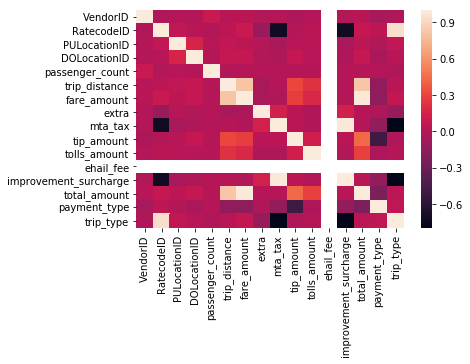

In [4]:
sns.heatmap(data_xls.corr())

In [5]:
data_xls.corr()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
VendorID,1.000000,-0.018102,0.008401,-0.001251,0.092104,0.024449,0.031129,-0.006734,-0.002079,-0.029719,0.001479,NaN,-0.003082,0.024435,-0.054485,-0.012279
RatecodeID,-0.018102,1.000000,0.056043,0.023705,-0.008791,0.046228,0.094818,-0.104791,-0.724162,-0.001841,0.027089,NaN,-0.710358,0.076432,0.041722,0.937916
PULocationID,0.008401,0.056043,1.000000,0.160510,0.017459,0.054496,0.043526,0.016584,-0.050710,0.022731,0.018792,NaN,-0.050318,0.045705,-0.006944,0.057118
DOLocationID,-0.001251,0.023705,0.160510,1.000000,0.006421,0.081727,0.069612,-0.009111,-0.012839,0.072450,0.014161,NaN,-0.014187,0.077096,-0.037394,0.020263
passenger_count,0.092104,-0.008791,0.017459,0.006421,1.000000,0.003049,0.006089,0.008839,0.006808,0.003340,0.007132,NaN,0.006515,0.007450,0.000338,-0.010348
trip_distance,0.024449,0.046228,0.054496,0.081727,0.003049,1.000000,0.815736,-0.046510,0.000471,0.312807,0.226666,NaN,0.006901,0.821364,-0.138584,0.021619
fare_amount,0.031129,0.094818,0.043526,0.069612,0.006089,0.815736,1.000000,-0.043465,-0.013743,0.273192,0.182370,NaN,-0.004206,0.979254,-0.142761,0.067395
extra,-0.006734,-0.104791,0.016584,-0.009111,0.008839,-0.046510,-0.043465,1.000000,0.143144,0.027688,-0.011167,NaN,0.142657,0.000696,-0.013914,-0.111163
mta_tax,-0.002079,-0.724162,-0.050710,-0.012839,0.006808,0.000471,-0.013743,0.143144,1.000000,0.026651,-0.015454,NaN,0.983917,0.007933,-0.133973,-0.791048
tip_amount,-0.029719,-0.001841,0.022731,0.072450,0.003340,0.312807,0.273192,0.027688,0.026651,1.000000,0.129161,NaN,0.032437,0.436925,-0.498141,-0.018603


# 2)Test for tolerance: 
     T = 1 – R² 
       = 1 – 0.983
       = 0.017
 With T < 0.1 there might be multicollinearity in the data. Hence, there is no multicolinearity in the model. 

# Checking for Multicolinearity
## 3) Variance Inflation Factor (VIF) – the variance inflation factor of the linear regression
 is defined as VIF = 1/T. With VIF > 10 there is an indication that multicollinearity may be present; 
 with VIF > 100 there is certainly multicollinearity among the variables.
 VIF = 1/ 0.017 = 588.2352941176471
 In the above model, Multicollinearity is not present. 

# Check for Autocorrelation 
Durbin-Watson’s d tests the null hypothesis while performing auto-correlation
Value of d = 1.7
As a rule of thumb values of 1.5 < d < 2.5 show that there is no auto-correlation in the data

# 4)Homoscedasticity Test
By plotting scatter plot we can check for Homoscedasticity.

In [22]:
model = ols("total_amount ~ trip_distance -1", data=data_xls).fit()
Y_pred = model.predict(data_xls[["trip_distance"]])
residual = data_xls["total_amount"].values-Y_pred
residual

0          4.387453
1          1.237263
2          2.395927
3         -4.424823
4          4.175177
5         -1.125202
6          2.685063
7          4.605302
8          4.601141
9          1.019338
10         0.657578
11         3.223846
12        -1.130852
13         5.364281
14        -0.706299
15         4.394514
16         2.258638
17        -5.409395
18         3.551765
19         4.711305
20         3.719609
21         2.727377
22        -2.345619
23         5.444514
24        -7.556054
25         4.853102
26         4.512125
27         7.540838
28        -0.092144
29         4.377925
            ...    
793499     3.097610
793500     3.599023
793501     0.714048
793502     0.480555
793503    -3.467157
793504    -5.241552
793505    -2.666104
793506     2.308474
793507     3.372711
793508    -7.178759
793509     3.427648
793510     3.138512
793511     1.974199
793512     4.409256
793513     3.235693
793514   -13.052523
793515     4.454514
793516    -2.422106
793517     0.418013


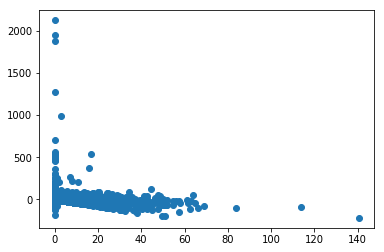

In [23]:
plt.scatter(data_xls[["trip_distance"]],residual)
plt.show()

# Fitting the Model 1:

In [11]:
cols_to_use = ['trip_distance', 'fare_amount', 'passenger_count']
X = data_xls[cols_to_use]
y = data_xls.total_amount

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)
X_train, X_test, y_train

(        trip_distance  fare_amount  passenger_count
 570273           2.70         12.5                1
 511189           1.09          6.0                1
 259380           0.73          4.5                1
 534735           0.66          6.0                1
 388507           3.78         13.0                1
 424842           4.06         17.5                1
 174548           0.41          3.5                1
 38411            1.31          7.5                1
 303576           4.68         20.0                1
 80644            1.20          6.0                1
 673964           1.95          8.5                1
 745833           3.27         14.5                1
 452245           6.44         23.0                1
 135100           1.79          8.5                1
 326757           1.75          8.5                1
 495603           1.63          8.5                1
 766875           1.30          7.0                1
 696378           6.95         23.0           

In [13]:
# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Print the coefficients
print (results.intercept_, results.coef_)

1.4463487385804576 [0.26277097 1.008416   0.01712764]


In [14]:
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_amount   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 1.541e+07
Date:                Sun, 18 Nov 2018   Prob (F-statistic):               0.00
Time:                        23:24:08   Log-Likelihood:            -1.7940e+06
No. Observations:              793529   AIC:                         3.588e+06
Df Residuals:                  793526   BIC:                         3.588e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
trip_distance       0.2619      0.002    165.437      0.000       0.259       0.265
fare_amount         1.0493      0.000   2511.525      0.000       1.048       1.050
passenger_count     0.4634      0.002    244.060      0.000       0.460       0.467
==============================================================================
Omnibus:                  1989971.957   Durbin-Watson:                   1.787
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     813355182428.888
Skew:                          26.190   Prob(JB):                         0.00
Kurtosis:                    4962.525   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Ranking of AIC BIC and R^2
The values of AIC and BIC ranges in the between 2-6 which tells us that we have a positive value and gives us a better fit.

In [42]:
reg = linear_model.LinearRegression()
reg.fit(data_xls[['trip_distance', 'fare_amount', 'passenger_count']], data_xls.total_amount)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
reg.coef_

array([0.26277097, 1.008416  , 0.01712764])

In [45]:
reg.intercept_

1.4463487385804576

In [58]:
list(zip(X, reg.coef_))

[(array([ 0.00020154,  0.00043382,  0.00326673,  0.00055763, -0.00015523,
          0.00072641,  0.00170848, -0.00026287, -0.00026307,  0.00177135,
          0.00086236, -0.00052727,  0.00060912, -0.00052077, -0.00052258,
          0.00027125, -0.00214741]), 0.2627709668219337),
 (array([ 1.00770483e-03,  1.04839610e-03,  3.26672582e-03, -1.93645488e-03,
         -6.31301993e-04, -1.13593525e-03,  3.52511427e-04, -1.01937401e-03,
         -1.58680244e-03,  1.64396855e-03, -2.53703250e-04,  7.58420415e-05,
         -1.59953678e-03, -6.11757820e-04,  1.24461718e-04, -1.29029906e-03,
          4.21673052e-04]), 1.0084160027633262),
 (array([ 6.16139525e-04,  7.23031792e-04,  6.53345164e-04, -6.74298624e-04,
         -3.27495873e-04, -6.74840790e-04,  2.07781947e-03, -1.51523737e-05,
         -1.18839756e-03,  9.22620747e-04, -1.37185347e-03,  2.34578152e-04,
         -2.20008312e-03, -1.49256794e-03,  2.20889972e-04,  8.27843658e-04,
          1.92339013e-04]), 0.017127635721709257)]

In [60]:
y = reg.predict(X_test)

In [61]:
reg.predict([[0.70,6.0,5]])

array([7.76642261])

# Cross Validation of the model 
After performing cross validation using K folds, the MAE output is non-negative floating point.Which tells that it is trained better and performing well.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
my_pipeline = make_pipeline(Imputer(), RandomForestRegressor())

In [28]:
cols_to_use = ['trip_distance', 'fare_amount', 'passenger_count']
X = data_xls[cols_to_use]
y = data_xls.total_amount

In [29]:
# 10-fold cross-validation with all three features
from sklearn.model_selection import cross_val_score
scores = cross_val_score(my_pipeline, X, y, scoring='neg_mean_absolute_error')
print(scores)

[-1.39103551 -1.38436778 -1.40093409]


In [62]:
# fix the sign of MSE scores
mse_scores = -scores
print(mse_scores)

[1.39103551 1.38436778 1.40093409]


In [63]:
# convert from MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[1.17942168 1.17659159 1.18361062]


In [64]:
# calculate the average RMSE
print(rmse_scores.mean())

1.1798746310319492


In [30]:
print('Mean Absolute Error %2f' %(-1 * scores.mean()))

Mean Absolute Error 1.392112


# R^2 value after fitting the Model

In [66]:
multi_lingreg = LinearRegression()

In [68]:
cols_to_use = ['trip_distance', 'fare_amount', 'passenger_count']
X = data_xls[cols_to_use]
y = data_xls.total_amount

In [69]:
multi_lingreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [70]:
r_square = multi_lingreg.score(X, y)
r_square

0.9604608405185575

In [2]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from scipy import stats

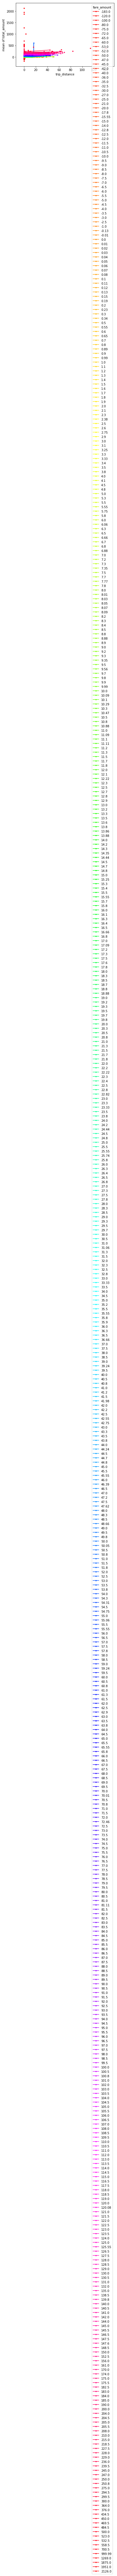

In [8]:
fig = interaction_plot(data_xls.trip_distance, data_xls.fare_amount, data_xls.total_amount)
#              colors=['red','blue'], markers=['D','^'], ms=10)

In [75]:
N = len(data_xls.passenger_count)
df_a = len(data_xls.fare_amount.unique()) - 1
df_b = len(data_xls.trip_distance.unique()) - 1
df_axb = df_a*df_b 
df_w = N - (len(data_xls.fare_amount.unique())*len(data_xls.trip_distance.unique()))

In [7]:
grand_mean = data_xls['passenger_count'].mean()

In [ ]:
# ssq_a = sum([(data_xls[data_xls.fare_amount ==l].passenger_count.mean()-grand_mean)**2 for l in data_xls.fare_amount])

In [ ]:
# ssq_b = sum([(data_xls[data_xls.trip_distance ==l].passenger_count.mean()-grand_mean)**2 for l in data_xls.trip_distance])